In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import algopy
from algopy import UTPM, exp
import copy
import calendar
from optimise_GDD_fctns import Phenology_set, run_GDD_and_get_RMSE, run_GDD_and_get_RMSE_derivs
#import seaborn as sns

import plotting
import dataset_fctns
import modelling_fctns
import seaborn as sns
#from dwd_phenpy import Phenology_set

#import openeo
#import ee
## Trigger the authentication flow.
#ee.Authenticate()#(auth_mode='localhost')
# Initialize the library.
#ee.Initialize(project='ee-martinparker637')

In [38]:
phen_data_CIMMYT = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\African_data\\with_SOS\\CIMMYT_phen_data.csv')
phen_data_CIMMYT = dataset_fctns.columns_to_datetime(phen_data_CIMMYT, ['PlantingDate', 'AnthesisDate', 'DaysToSilk'])
phen_data_CIMMYT = phen_data_CIMMYT.rename(columns={'AnthesisDate': 'observed time to beginning of flowering'})
phen_data_CIMMYT = dataset_fctns.prepare_African_phen_ds(phen_data_CIMMYT, 'beginning of flowering')#'PlantingDate', 
phen_data_CIMMYT = phen_data_CIMMYT.loc[(phen_data_CIMMYT['observed time to beginning of flowering'] - phen_data_CIMMYT['WC SOS date']).dt.days < 240]
#phen_data_CIMMYT['WC SOS date'] = pd.to_datetime(phen_data_CIMMYT['PlantingDate'].dt.date)
phen_data_CIMMYT['pd'] = pd.to_datetime(phen_data_CIMMYT['PlantingDate'].dt.date)
phen_data_CIMMYT['Referenzjahr'] = phen_data_CIMMYT['yrcode']

yes


In [ ]:
phen_data_CIMMYT['planting date minus WC SOS'] = (phen_data_CIMMYT['pd'] - phen_data_CIMMYT['WC SOS date']).dt.days

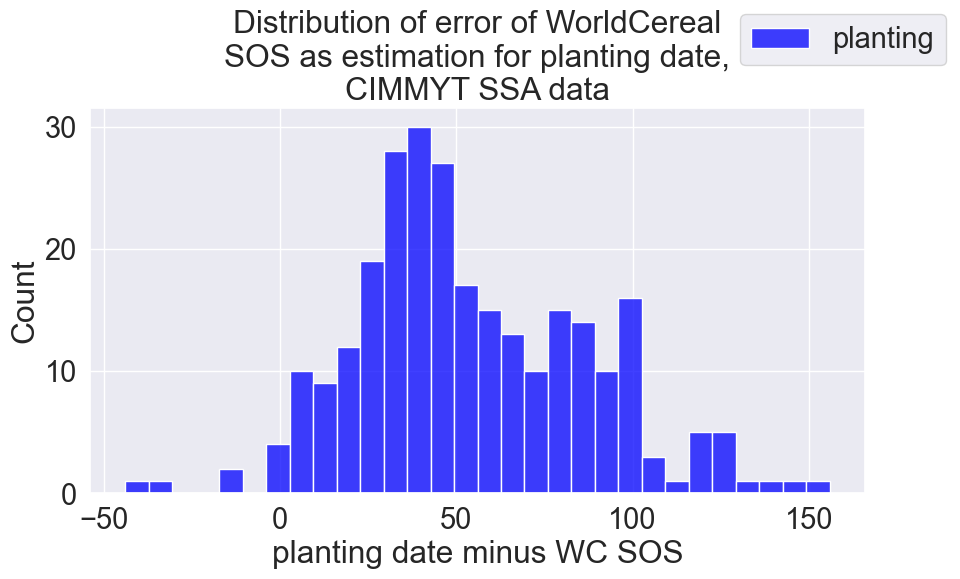

In [16]:
phen_data_CIMMYT['planting date minus WC SOS'] = (phen_data_CIMMYT['pd'] - phen_data_CIMMYT['WC SOS date']).dt.days
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data=phen_data_CIMMYT, x="planting date minus WC SOS", bins =30, ax=ax, color='blue', label = 'planting')
#sns.histplot(data=phen_data_lobell, x='AnthesisDate', bins =60, ax=ax, color='red', label = 'flowering')
#sns.histplot(data=phen_data_lobell, x='DaysToSilk', bins =60, ax=ax, color='green', label = 'silking')
sns.set(font_scale=1.9)
ax.set(ylabel='Count', title='Distribution of error of WorldCereal\nSOS as estimation for planting date,\nCIMMYT SSA data')
fig.legend()
fig.savefig('plots/planting_date_error.png', bbox_inches='tight')
#plt.show()

In [6]:
#phen_data_lobell.loc[((phen_data_lobell['observed time to beginning of flowering'] - phen_data_lobell['WC SOS date']).dt.days > 200) & (phen_data_lobell['SOS2'] != -999)].drop_duplicates(subset = ['Referenzjahr', 'Stations_id'])#['SOS2'].unique()

In [7]:
#phen_data_lobell.to_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\African_data\\Lobell2011\\CIMMY_phen_data.csv')

In [6]:
Maize_set_Africa = Phenology_set('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\African_data\\Lobell2011\\maizedata.lobell.sep2011.csv', raw = False, dwd_data=False)
Maize_set_Africa.phen_data = phen_data_CIMMYT
Maize_set_Africa.get_mean_T('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\Africa\\ERA5_SSA_1999_2009.nc')
Maize_set_Africa.phen_data['Eintrittsdatum'] = Maize_set_Africa.phen_data['PlantingDate']
#Maize_set_Africa.phen_data['Stations_id'] = Maize_set_Africa.phen_data['sitecode']
Maize_set_Africa.make_input_array(latlon_proj=True)

project to new coords
interpolate driver to station locations


In [7]:
#Maize_set = Phenology_set("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_1936_2023_hist.txt", raw = True)
Maize_set = Phenology_set('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\maize_phenology_20250224.csv', raw = False)
Maize_set.drop_columns(['Unnamed: 9', 'Unnamed: 0'])
Maize_set.phase_order_name([10, 12, 67, 65, 5, 6, 19, 20, 21, 24, ])

Maize_set.get_mean_T('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2011_2024.nc') #C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tas_hyras_5_1951_2020_v5-0_de.nc')
Maize_set.make_input_array(latlon_proj=True)
#Maize_set.GDD_driver_data = Maize_set.GDD_driver_data.where(Maize_set.GDD_driver_data['time'] >= np.datetime64('2012-01-01'), drop = True)
Maize_set.get_mean_T('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2001_2010.nc')
Maize_set.make_input_array(latlon_proj=True)
Maize_set.phase_list = ['beginning of emergence', 'beginning of flowering', 'yellow ripeness']
Maize_set.get_observed_dataset()

Column Unnamed: 9 not found
project to new coords
interpolate driver to station locations


In [11]:
#Maize_set_Africa.phen_data['WC SOS date'][(Maize_set_Africa.phen_data['SOS'] > Maize_set_Africa.phen_data['EOS'])].dt.dayofyear.min()#['WC SOS date'].dt.dayofyear.max()

In [46]:
def put_temp_values_in_frame(driver_array, ds_observed, driver_variable, latlon_proj = True, phase_list = ['yellow ripeness'], SOS_offset = 0, station_locations = False):
    observations_to_use = ds_observed[['Stations_id', 'Referenzjahr', 'WC SOS date']].where(ds_observed['Referenzjahr'] > 1999).dropna(how='all').drop_duplicates()
    observations_to_use['WC SOS date'] += np.timedelta64(SOS_offset, 'D')
    observations_to_use['SOS_year'] = observations_to_use['WC SOS date'].dt.year
    observations_to_use = observations_to_use.drop_duplicates(subset = ['SOS_year', 'Stations_id'])
    # make an indexing array to pull values from the array of temperatures
    time_station = xr.Dataset.from_dataframe(observations_to_use)
    time_station = time_station.rename({'index':'observation', 'WC SOS date':'time'})
    #print(time_station)
    if not(latlon_proj):
        time_station['time'] += np.timedelta64(12, 'h')

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(time_station.sizes['observation']) #Continuous development time. When this passes through some thresholds then have change in phase.
    dev_time_series = [t_dev.copy()]
    ## Make sure driver dataset uses station id to index this dimension
    try:
        driver_array = driver_array.set_xindex(['Stations_id'])
    except:
        print('Couldn\'t reset index for station')
    
    #Run model
    for day in range(300):
        print(day)
        # Pull values for temperature out of data frame
        driver_values = driver_array.sel(time_station[['Stations_id', 'time']])#[driver_variable]#.values 
        #print('sel function applied')
        driver_frame_at_day = driver_values[[driver_variable, 'Stations_id', 'time']].to_pandas().reset_index().drop(['number', 'lon', 'lat', 'observation'], axis=1)
        #print('converted to pandas frame')
        if day == 0:
            SOS_years = driver_frame_at_day['time'].dt.year
            
            #Referenzjahrs = driver_frame_at_day['time'].dt.year + (driver_frame_at_day['time'].dt.dayofyear > 180)
        driver_frame_at_day['SOS_year'] = SOS_years #driver_frame_at_day['time'].dt.year
        #print(driver_frame_at_day)
        driver_frame_at_day = driver_frame_at_day.drop('time', axis=1)
        driver_frame_at_day = driver_frame_at_day.rename(columns = {driver_variable:f'temperature at day {day}'})
        #print(len(observations_to_use[['SOS_year', 'Stations_id']]), len(observations_to_use[['SOS_year', 'Stations_id']].drop_duplicates()),
        #    len(driver_frame_at_day[['SOS_year', 'Stations_id']]), len(driver_frame_at_day[['SOS_year', 'Stations_id']].drop_duplicates()))
        observations_to_use = observations_to_use.merge(driver_frame_at_day, on=['SOS_year', 'Stations_id'], how='inner')
        #print(observations_to_use)
        #print('merged')
        time_station['time'] += np.timedelta64(1, 'D')
    ds = observations_to_use.merge(ds_observed[['Referenzjahr', 'Stations_id'] + [f'observed time to {phase}' for phase in phase_list]]).drop_duplicates(subset = ['Referenzjahr', 'Stations_id'])
    #return ds
    ds = ds.dropna(subset = ['temperature at day 0'] + [f'observed time to {phase}' for phase in phase_list]).drop_duplicates()#
    ds[[f'observed time to {phase}' for phase in phase_list]] = ds[[f'observed time to {phase}' for phase in phase_list]] + np.timedelta64(-SOS_offset, 'D')
    if type(station_locations) != bool:
        ds = get_station_locations(ds, station_locations)
    return ds#, observations_to_use, driver_frame_at_day

In [47]:
phen_data_after_97 = Maize_set_Africa.phen_data.loc[Maize_set_Africa.phen_data['WC SOS date'] >= np.datetime64('1999-01-01')]
ds = put_temp_values_in_frame(Maize_set_Africa.GDD_driver_data, phen_data_after_97, 't2m', phase_list = ['beginning of flowering'],
                               SOS_offset=12, station_locations=False)#, dad, otu 
#ds1 = ds1.dropna(subset = ['temperature at day 0', 'observed time to yellow ripeness']).drop_duplicates()#
ds['observed time to beginning of flowering'] = ds['observed time to beginning of flowering'] - ds['WC SOS date']
ds = ds.where((ds['observed time to beginning of flowering'].dt.days > 0) & (ds['observed time to beginning of flowering'].dt.days < 200)).dropna()
#ds = ds1
#ds1 = put_ERA5_in_array(ds1)

Couldn't reset index for station
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2

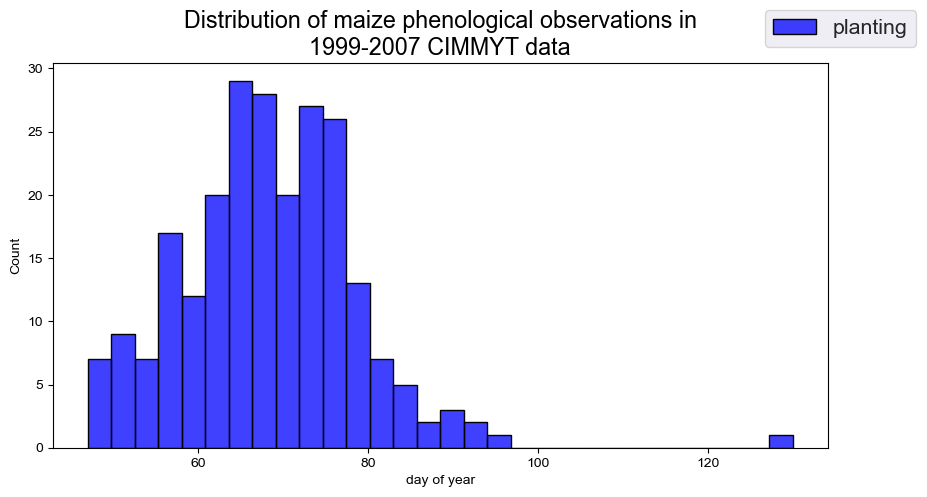

In [27]:
ds['observed time to beginning of flowering'] = ds['observed time to beginning of flowering'].dt.days
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data=ds, x="observed time to beginning of flowering", bins =30, ax=ax, color='blue', label = 'planting')
#sns.histplot(data=phen_data_lobell, x='AnthesisDate', bins =60, ax=ax, color='red', label = 'flowering')
#sns.histplot(data=phen_data_lobell, x='DaysToSilk', bins =60, ax=ax, color='green', label = 'silking')
sns.set(font_scale=1.4)
ax.set(xlabel='day of year', ylabel='Count', title='Distribution of maize phenological observations in\n1999-2007 CIMMYT data')
fig.legend()
fig.savefig('plots/CIMMYT_phenology_distn.png', bbox_inches='tight')
#plt.show()

In [31]:
ds1 = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['yellow ripeness'],
                               SOS_offset=0, station_locations=Maize_set.station_data)
#ds1 = ds1.dropna(subset = ['temperature at day 0', 'observed time to yellow ripeness']).drop_duplicates()#
ds1 = ds1.where(ds1['observed time to yellow ripeness'].dt.days > 50).dropna()
ds1 = put_ERA5_in_array(ds1)
ds2 = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['yellow ripeness'],
                               SOS_offset=12, station_locations=Maize_set.station_data)
#ds2['WC SOS date'] = ds2['WC SOS date']# +np.timedelta64(12, 'D')
ds2 = ds2.where(ds2['observed time to yellow ripeness'].dt.days > 50).dropna()
ds2 = put_ERA5_in_array(ds2)


Couldn't reset index for station
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2

In [16]:
ds_DE = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['beginning of flowering'],
                              SOS_offset=0, station_locations=Maize_set.station_data)
ds_DE = ds_DE.where(ds_DE['observed time to beginning of flowering'].dt.days > 30).dropna()
ds_DE = put_ERA5_in_array(ds_DE)
#print(ds['observed time to beginning of flowering'].dt.days.std(), 
#      ds1['observed time to yellow ripeness'].dt.days.std(), 
#      ds2['observed time to yellow ripeness'].dt.days.std())

Couldn't reset index for station
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2

In [33]:
warm_threshold = 10
ds1_warm = ds1.loc[ds1['ERA5 clim'] > warm_threshold]
ds2_warm = ds2.loc[ds2['ERA5 clim'] > warm_threshold]
ds_warm = ds.loc[ds['ERA5 clim'] > warm_threshold]
ds1_cold = ds1.loc[ds1['ERA5 clim'] <= warm_threshold]
ds2_cold = ds2.loc[ds2['ERA5 clim'] <= warm_threshold]
ds_cold = ds.loc[ds['ERA5 clim'] <= warm_threshold]

In [135]:
print(ds1_warm['observed time to yellow ripeness'].dt.days.std(), ds2_warm['observed time to yellow ripeness'].dt.days.std(), ds_warm['observed time to beginning of flowering'].dt.days.std())

14.344866753121218 14.344866753121218 10.246885166016233


In [10]:
T = np.array([24, 24, 24])
T_min = np.array([10, 10, 10])
T_opt = np.array([28, 28, 28])
T_max = np.array([36, 36, 36])
D = Wang_Temp_Derivs(T, T_min, T_opt, T_max)
D

[array([-0.00371164, -0.00371164, -0.00371164]),
 array([-0.08283785, -0.08283785, -0.08283785]),
 array([0.02328237, 0.02328237, 0.02328237])]

In [11]:
Wang_num_deriv = np.array([(modelling_fctns.Wang_Engel_Temp_response(24, 10.01, 28, 36) - modelling_fctns.Wang_Engel_Temp_response(24, 9.99, 28, 36))/0.02,
                  (modelling_fctns.Wang_Engel_Temp_response(24, 10, 28.001, 36) - modelling_fctns.Wang_Engel_Temp_response(24, 10, 27.999, 36))/0.002,
                  (modelling_fctns.Wang_Engel_Temp_response(24, 10, 28, 36.01) - modelling_fctns.Wang_Engel_Temp_response(24, 10, 28, 35.99))/0.02])
Wang_num_deriv

array([-0.00371164, -0.08283785,  0.02328241])

In [21]:
def local_opt(x1s, ds, lower_bounds = [0.05, 4, 20, 20, 35], upper_bounds = [1, 12, 35, 35, 60], 
              great_threshold = 13, response_type = 'Trapezoid', phase_list = ['yellow ripeness'],
              method = 'trust-constr', modified_cost = False, thresholds = [100], growing_period_length = 185,
              maxiter = 50, split = True, test_size = 0.5):
    if split:
        train, test = train_test_split(ds, test_size=test_size, random_state = 1)
    else:
        train = ds
        test = ds
    only_phase = phase_list[0]
    if response_type == 'Trapezoid':
        ineq_cons = {'type': 'ineq',
                    'fun' : lambda x: np.array([x[2] - x[1],
                                                x[3] - x[2],
                                                x[4] - x[3]]),
                    'jac' : lambda x: np.array([[0, -1, 1, 0, 0],
                                                [0, 0, -1, 1, 0],
                                                [0, 0, 0, -1, 1]])}
        constraints = scipy.optimize.LinearConstraint([[0, -1, 1, 0, 0], [0, 0, -1, 1, 0], [0, 0, 0, -1, -1]], [0, 0, 0], [np.inf, np.inf, np.inf])
    elif response_type == 'Wang':
        ineq_cons = {'type': 'ineq',
                    'fun' : lambda x: np.array([x[2] - x[1],
                                                x[3] - x[2]]),
                    'jac' : lambda x: np.array([[0, -1, 1, 0],
                                                [0, 0, -1, 1]])}
        ieq_cons = [lambda x: x[2] - x[1],
                    lambda x: x[3] - x[2]]
        constraints = scipy.optimize.LinearConstraint(np.array([[0, -1, 1, 0], [0, 0, -1, 1]]),lb= [0, 0], ub=[1000, 1000])
    bounds = scipy.optimize.Bounds(lb=lower_bounds, ub = upper_bounds)
    x0 = np.array([1, 4, 25, 35, 45])
    final_mins = []
    for x0 in x1s:
        if method == 'trust-constr':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', 
                                                                         response_type = response_type, 
                                                                         phase_list = phase_list, 
                                                                         new_unfinished_penalisation=modified_cost, 
                                                                         growing_period_length = growing_period_length,
                                                                         thresholds = thresholds), 
                                    x0, method = 'trust-constr',#'COBYQA',
                                    jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', 
                                                                                response_type = response_type, 
                                                                                phase_list = phase_list, 
                                                                                growing_period_length=growing_period_length,
                                                                                thresholds = thresholds),#jac='3-point',#
                                    constraints=[constraints],
                                    options={'verbose': 3, 'initial_tr_radius': 1, 'gtol':1e-4, 'maxiter':maxiter},
                                    bounds=bounds, tol=1e-9)
        elif method == 'SLSQP':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', 
                                                                         response_type = response_type, 
                                                                         phase_list = phase_list,
                                                                         new_unfinished_penalisation=modified_cost,
                                                                         growing_period_length=growing_period_length,
                                                                         thresholds = thresholds), 
                                    x0, method = 'SLSQP',
                                    #jac = '3-point',
                                    jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', 
                                                                                response_type = response_type, 
                                                                                phase_list = phase_list, 
                                                                                growing_period_length=growing_period_length,
                                                                                thresholds = thresholds),#jac='3-point',#
                                    constraints=[ineq_cons],
                                    options={'disp': 3, 'maxiter':50, 'ftol': 1e-16},
                                    bounds=bounds)#, tol=1e-15)
        elif method == 'Nelder-Mead':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', 
                                                                         response_type = response_type, 
                                                                         phase_list = phase_list,
                                                                         new_unfinished_penalisation=modified_cost,
                                                                         growing_period_length=growing_period_length,
                                                                         thresholds = thresholds), 
                                    x0, method = 'Nelder-Mead',
                                    #jac = '3-point',
                                    #jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', 
                                    #                                            response_type = response_type, 
                                    #                                            phase_list = phase_list, 
                                    #                                            growing_period_length=growing_period_length,
                                    #                                            thresholds = thresholds),#jac='3-point',#
                                    options={'disp': True},#, 'maxiter':50
                                    bounds=bounds)#, tol=1e-15)
        elif method == 'Powell':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', 
                                                                         response_type = response_type, 
                                                                         phase_list = phase_list,
                                                                         new_unfinished_penalisation=modified_cost,
                                                                         growing_period_length=growing_period_length,
                                                                         thresholds = thresholds), 
                                    x0, method = 'Powell',
                                    #jac = '3-point',
                                    #jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', 
                                    #                                            response_type = response_type, 
                                    #                                            phase_list = phase_list, 
                                    #                                            growing_period_length=growing_period_length,
                                    #                                            thresholds = thresholds),#jac='3-point',#
                                    options={'disp': True},#, 'maxiter':50
                                    bounds=bounds)
        print(x0, res.x, x0 - res.x)
        print('RMSE at opt on test set: ', run_GDD_and_get_RMSE(res.x, test, 't2m', response_type = response_type, phase_list = phase_list, thresholds = thresholds))
        print('R^2:', 1 - (run_GDD_and_get_RMSE(res.x, test, 't2m', response_type = response_type, phase_list = phase_list, thresholds = thresholds, growing_period_length=growing_period_length, new_unfinished_penalisation=modified_cost)**2/(test[f'observed time to {only_phase}'].dt.days.var())))
        final_mins.append(res.x)
    return final_mins, res

In [22]:
def plot_profiles_at_minimum(x_opt, ds, lb=[0.05, 4, 20, 20, 35], ub = [1, 12, 33, 33, 60], 
                             response_type = 'Trapezoid', phase_list = ['yellow ripeness'],
                             growing_period_length = 300, new_unfinished_penalisation=False,
                             thresholds = [100], title = ''):
    x_min = x_opt.copy()
    fig, axs = plt.subplots(1, len(x_min), figsize = (15, 4))
    if response_type == 'Trapezoid':
        parameter_names = ['Scale', 'T_min', 'T_opt1', 'T_opt2', 'T_max']
    elif response_type == 'Wang':
        parameter_names = ['Scale', 'T_min', 'T_opt', 'T_max']
    for x_index in range(len(x_min)):
        parameter_name = parameter_names[x_index]
        print(f'Plotting {parameter_name}')
        if x_index == 0:
            x_i = np.arange(x_min[x_index] - 0.02, x_min[x_index] + 0.02, 0.005)#0.002)
        elif x_index > 2:
            x_i = np.arange(x_min[x_index] - 1/2, x_min[x_index] + 1/2, 0.1)#0.05)
        else:
            x_i = np.arange(x_min[x_index] - 1/2, x_min[x_index] + 1/2, 0.1)#0.05)
        RMSEs = np.zeros(x_i.shape)
        for i in range(x_i.shape[0]):
            #print(x_i[i])
            x_for_plotting = x_min.copy()
            x_for_plotting[x_index] = x_i[i]
            RMSEs[i] = run_GDD_and_get_RMSE(x_for_plotting, ds, 't2m', response_type=response_type, phase_list = phase_list,
                                            growing_period_length = growing_period_length, new_unfinished_penalisation=new_unfinished_penalisation,
                                            thresholds = thresholds)
        axs[x_index].plot(x_i, RMSEs, label = 'Cost as parameter changes')
        axs[x_index].axvline(lb[x_index], linestyle = '--', color = 'red', label = 'bounds of optimisation')
        axs[x_index].axvline(ub[x_index], linestyle = '--', color = 'red')
        #axs[x_index].axvline(x_min[x_index], color = 'green', label = 'Optimized value')
        axs[x_index].scatter(x_min[x_index], 
                             run_GDD_and_get_RMSE(x_min, ds, 't2m', response_type=response_type, phase_list = phase_list,
                                                  growing_period_length = growing_period_length, new_unfinished_penalisation=new_unfinished_penalisation,
                                                  thresholds = thresholds),
                            color = 'green', label = 'Optimized value')
        axs[x_index].set_xlim(x_i.min(), x_i.max())
        axs[x_index].set(xlabel = parameter_name)
        axs[x_index].set(ylabel = 'Cost')
        if x_index == 0:
            fig.legend()
    fig.suptitle('Profiles of RMSE for adapting parameters' + title)
    fig.tight_layout()

In [23]:
x1s = [np.array([0.5, 8, 28, 39])]
#x1s = [np.array([0.32531922, 7.11557392, 25.30018333, 39.35554162])]
fm_flowering_all = local_opt(x1s, ds, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='Powell',
                     thresholds = [20], growing_period_length=300,
                     test_size = 0.2)

Optimization terminated successfully.
         Current function value: 33.718714
         Iterations: 6
         Function evaluations: 572
[ 0.5  8.  28.  39. ] [ 0.18833668  7.5060529  25.0202482  39.96409198] [ 0.31166332  0.4939471   2.9797518  -0.96409198]
RMSE at opt on test set:  31.068782254366372
R^2: 0.010672044298993266


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


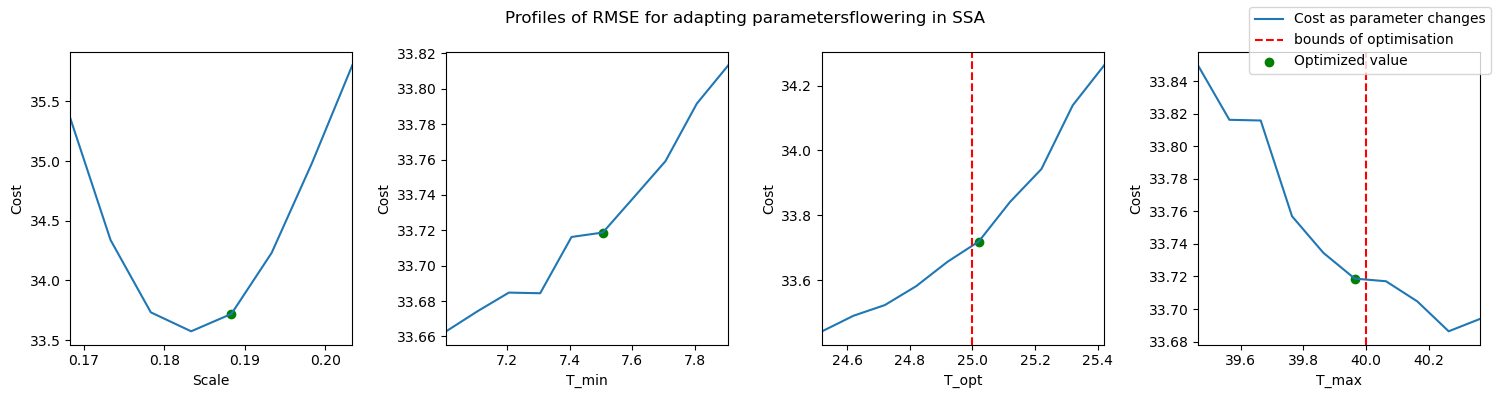

In [31]:
train_a, test_a = train_test_split(ds, test_size=0.2, random_state = 1)
plot_profiles_at_minimum(fm_flowering_all[0][0], train_a, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=300, new_unfinished_penalisation=False,
                         thresholds = [20], title = 'flowering in SSA')

In [49]:
phen_data_CIMMYT

,Stations_id,yrcode,lat,lon,observed time to beginning of flowering,SOS,EOS,SOS2,EOS2,PlantingDate,WC SOS date,pd,Referenzjahr
1,6,2004.0,-5.60,12.20,2004-04-19 11:36:38.918918912,43.0,214.0,-999.0,-999.0,2004-02-20 07:27:34.054054016,2004-02-13,2004-02-20,2004.0
2,7,2004.0,-9.42,15.75,2004-02-10 04:36:05.950413184,260.0,159.0,46.0,167.0,2003-12-07 04:57:31.239669376,2003-09-18,2003-12-07,2004.0
3,7,2005.0,-9.42,15.75,2005-04-03 18:13:57.209302272,260.0,159.0,46.0,167.0,2005-01-19 19:20:55.813953536,2004-09-17,2005-01-19,2005.0
4,8,2004.0,-11.42,15.12,2004-02-23 16:00:00.000000000,260.0,159.0,46.0,167.0,2003-12-15 08:20:52.173913088,2003-09-18,2003-12-15,2004.0
5,8,2005.0,-11.42,15.12,2005-04-02 18:25:45.688073344,260.0,159.0,46.0,167.0,2005-01-25 13:12:39.633027584,2004-09-17,2005-01-25,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1063,2003.0,-17.70,31.20,2003-02-03 00:09:36.000000000,301.0,145.0,8.0,128.0,2002-11-29 00:00:00.000000000,2002-10-29,2002-11-29,2003.0
282,1064,2003.0,-17.67,31.17,2003-04-08 03:23:17.647058816,301.0,145.0,8.0,128.0,2002-11-29 00:00:00.000000000,2002-10-29,2002-11-29,2003.0
283,1064,2006.0,-17.67,31.17,2006-02-22 11:17:00.895522432,301.0,145.0,8.0,128.0,2005-12-16 00:00:00.000000000,2005-10-29,2005-12-16,2006.0
284,1065,2003.0,-17.70,31.20,2003-02-03 19:48:00.000000000,301.0,145.0,8.0,128.0,2002-11-29 00:00:00.000000000,2002-10-29,2002-11-29,2003.0


In [48]:
x1s = [np.array([0.32531922, 7.11557392, 25.30018333, 39.35554162])]
x1s = [np.array([0.5, 8, 28, 39])]
fm_flowering_tc, res = local_opt(x1s, ds, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='trust-constr',
                     thresholds = [20], growing_period_length=300,
                     test_size = 0.2, maxiter = 100)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   1   |   0   | +5.6020e+01 | 1.00e+00 | 4.09e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   2   |   1   | +5.7078e+01 | 7.00e+00 | 7.09e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   3   |   5   | +5.2297e+01 | 7.00e+00 | 1.52e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   4   |   4   |   9   | +4.8825e+01 | 7.00e+00 | 1.42e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   5   |   5   |  13   | +4.4975e+01 | 7.00e+00 | 1.20e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   6   |   6   |  17   | +4.1541e+01 | 7.00e+00 | 8.07e+00 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   7   |   8   |  21   | +4.1541e+01 | 7.00e-01 | 8.07e+00 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   8   |   9   |  24   | +4.0257e+01 | 7.00e-

MemoryError: Unable to allocate 50.9 PiB for an array with shape (7156613647058818,) and data type float64

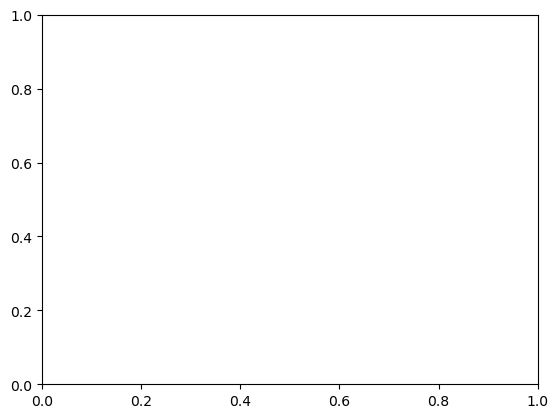

In [23]:
sns.histplot(data=ds, x="observed time to beginning of flowering", bins =30, color='blue', label = 'planting')

In [25]:
ds['observed time to beginning of flowering']

0      59 days 11:36:38.918918912
1      65 days 04:36:05.950413184
2      74 days 18:13:57.209302272
3                70 days 16:00:00
4      67 days 18:25:45.688073344
                  ...            
232              66 days 00:09:36
233   130 days 03:23:17.647058816
234    68 days 11:17:00.895522432
235              66 days 19:48:00
236    59 days 00:49:22.285714304
Name: observed time to beginning of flowering, Length: 236, dtype: timedelta64[ns]

In [ ]:
x_opt = one_by_one_optimisation(fm_flowering_tc[0], train_a, #np.array(x_opt)
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=300,
                         thresholds = [20])

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


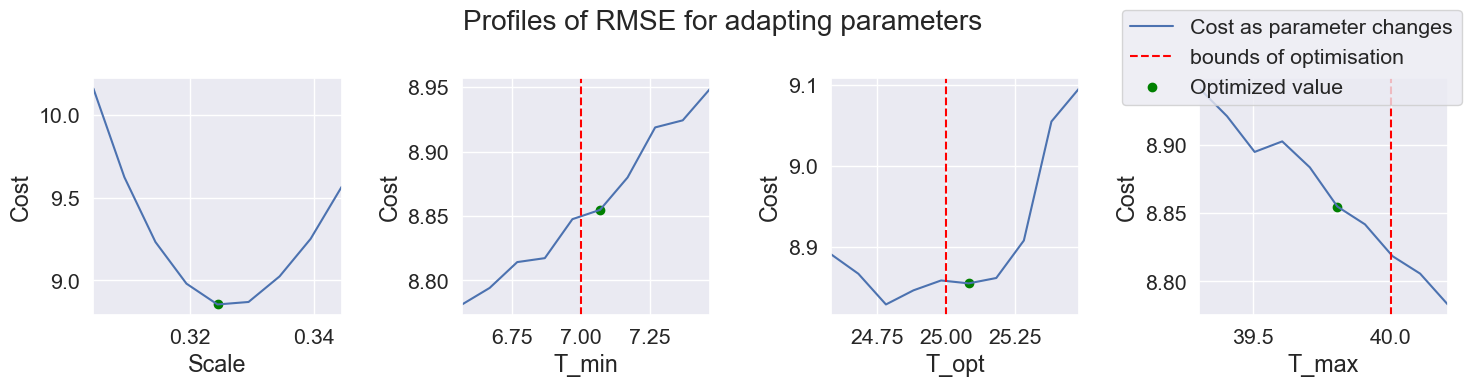

In [41]:
train_a, test_a = train_test_split(ds, test_size=0.2, random_state = 1)
plot_profiles_at_minimum(fm_flowering_tc[0], train_a, #fm2s[0], ds2, #fm2s[0] x_opt np.array([x_opt[0], 7, 25, 40])
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=300, new_unfinished_penalisation=False,
                         thresholds = [20])

In [215]:
fm_flowering_tc

[array([ 0.1111088 ,  7.55866657, 30.18307854, 39.99649793])]

In [212]:
start_year = 2000
end_year = 2023
step = 2
response_type = 'Wang'
phase_list = ['yellow ripeness']
method = 'trust-constr', 
modified_cost = False, 
thresholds = [100], 
growing_period_length = 185,
maxiter = 50
x1s = [np.array([0.3, 6, 29.5, 42])]
param_list = []
for year in range(start_year, end_year, step):
    ds2_warm_period = ds2_warm.loc[(ds2_warm['Referenzjahr'] >= year)*(ds2_warm['Referenzjahr'] < year + step)]
    fms, res = local_opt(x1s, ds2_warm_period, 
                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [10, 7.5, 33, 44],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness'],
                     method='Nelder-Mead',
                     thresholds = [20], growing_period_length=200,
                     maxiter = 300, split = False)
    plot_profiles_at_minimum(fms[0], ds2_warm_period, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 5, 28, 38], ub = [5, 7.5, 33, 44], 
                         response_type = 'Wang', phase_list = ['yellow ripeness'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])
    param_list.append(fms[0])
    #print(ds2_warm_period)


NameError: name 'ds2_warm' is not defined

In [15]:
x1s = [np.array([0.3, 6, 29.5, 42])]
#x1s = [fms[0]]
fm_all_ripeness, res = local_opt(x1s, ds2, 
                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [10, 7.5, 33, 44],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness'],
                     method='Nelder-Mead',
                     thresholds = [20], growing_period_length=200,
                     maxiter = 300)

Optimization terminated successfully.
         Current function value: 14.168034
         Iterations: 130
         Function evaluations: 237
[ 0.3  6.  29.5 42. ] [ 0.24281304  5.00383729 28.15685861 43.96110362] [ 0.05718696  0.99616271  1.34314139 -1.96110362]
RMSE at opt on test set:  19.941897092174766
R^2: -0.029379434800168136


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


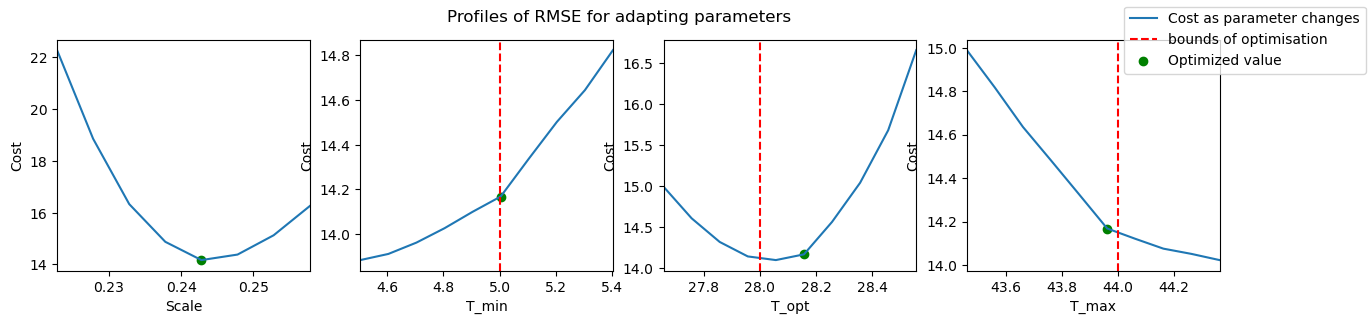

In [21]:
train, test = train_test_split(ds2, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fm_all_ripeness[0], train, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 5, 28, 38], ub = [5, 7.5, 33, 44], 
                         response_type = 'Wang', phase_list = ['yellow ripeness'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [16]:
#x1s = [np.array([2.22415, 10, 27, 39.5])]#,
x1s = [np.array([0.3, 6, 29.5, 42])]
fms, res = local_opt(x1s, ds2_cold, 
                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [10, 7.5, 33, 44],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness'],
                     method='Nelder-Mead',
                     thresholds = [20])


Optimization terminated successfully.
         Current function value: 13.376611
         Iterations: 107
         Function evaluations: 206
[ 0.3  6.  29.5 42. ] [ 0.25222093  5.01214034 28.02067488 43.695618  ] [ 0.04777907  0.98785966  1.47932512 -1.695618  ]
RMSE at opt on test set:  17.82466439988874
R^2: 0.12521048556632275


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


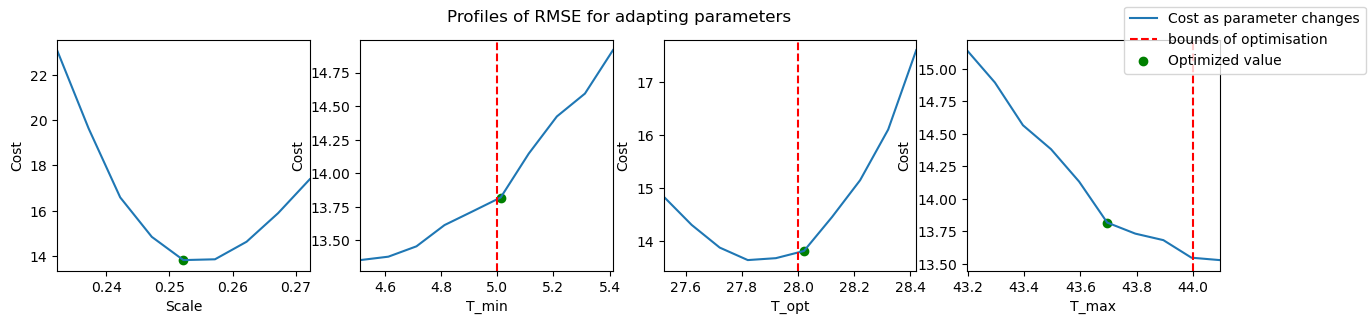

In [17]:
train, test = train_test_split(ds2_cold, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fms[0], train, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 5, 28, 38], ub = [5, 7.5, 33, 44], 
                         response_type = 'Wang', phase_list = ['yellow ripeness'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [18]:
#x1s = [np.array([2.22415, 10, 27, 39.5])]#,
x1s = [np.array([0.3, 6, 29.5, 42])]
#x1s = [fms[0]]
fm2s, res = local_opt(x1s, ds2_warm, 
                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [10, 7.5, 33, 44],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness'],
                     method='trust-constr',
                     thresholds = [20], growing_period_length=200,
                     maxiter = 300)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   1   |   0   | +1.5930e+01 | 1.00e+00 | 1.62e+02 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   2   |   1   | +1.3414e+02 | 2.00e+00 | 2.11e+07 | 2.77e-02 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   3   |   5   | +6.9101e+01 | 1.15e+01 | 2.69e+01 | 0.00e+00 | 4.56e+05 |  1.00e-01   |   2   |
|   4   |   4   |   9   | +6.9101e+01 | 1.15e+01 | 1.77e+02 | 0.00e+00 | 4.56e+05 |  1.00e-01   |   2   |
|   5   |   5   |  13   | +6.9101e+01 | 1.15e+01 | 3.55e+02 | 0.00e+00 | 4.56e+05 |  1.00e-01   |   1   |
|   6   |   6   |  17   | +6.9101e+01 | 1.15e+01 | 4.56e+02 | 0.00e+00 | 4.56e+05 |  1.00e-01   |   1   |
|   7   |   7   |  21   | +6.8890e+01 | 1.15e+01 | 1.73e+03 | 0.00e+00 | 4.56e+05 |  1.00e-01   |   1   |
|   8   |   8   |  25   | +1.2244e+01 | 1.15e+

c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  74   |  121  |  147  | +1.2058e+01 | 1.00e-01 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   4   |
|  75   |  123  |  148  | +1.2058e+01 | 1.00e-02 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   4   |
|  76   |  124  |  149  | +1.2058e+01 | 4.65e-03 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  77   |  126  |  150  | +1.2058e+01 | 1.13e-03 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   4   |
|  78   |  128  |  151  | +1.2058e+01 | 5.29e-04 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  79   |  130  |  152  | +1.2058e+01 | 2.64e-04 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |


c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  80   |  132  |  153  | +1.2058e+01 | 9.37e-05 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  81   |  134  |  154  | +1.2058e+01 | 3.21e-05 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |


c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  82   |  136  |  155  | +1.2058e+01 | 5.13e-06 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  83   |  138  |  156  | +1.2058e+01 | 5.13e-07 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  84   |  140  |  157  | +1.2058e+01 | 5.13e-08 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  85   |  142  |  158  | +1.2058e+01 | 5.13e-09 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  86   |  144  |  159  | +1.2058e+01 | 5.13e-10 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  87   |  145  |  159  | +1.2058e+01 | 1.00e+00 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   0   |
|  88   |  147  |  160  | +1.2058e+01 | 1.00e-01 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  89   |  149  |  161  | +1.2058e+01 | 1.00e-02 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  90   |  150  |  162  | +1.2058e+01 | 2.89e-03 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  91   |  151  |  163  | +1.2058e+01 | 5.10e-

c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  132  |  225  |  201  | +1.2058e+01 | 1.00e-03 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   4   |
|  133  |  227  |  202  | +1.2058e+01 | 2.45e-04 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   4   |
|  134  |  228  |  203  | +1.2058e+01 | 8.96e-05 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  135  |  230  |  204  | +1.2058e+01 | 2.97e-05 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  136  |  232  |  205  | +1.2058e+01 | 4.45e-06 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  137  |  234  |  206  | +1.2058e+01 | 4.45e-07 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  138  |  236  |  207  | +1.2058e+01 | 4.45e-08 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  139  |  238  |  208  | +1.2058e+01 | 4.45e-09 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  140  |  240  |  209  | +1.2058e+01 | 4.45e-10 | 2.01e+00 | 0.00e+00 | 1.00e+00 |  2.56e-07   |   2   |
|  141  |  241  |  209  | +1.2058e+01 | 1.00e+

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


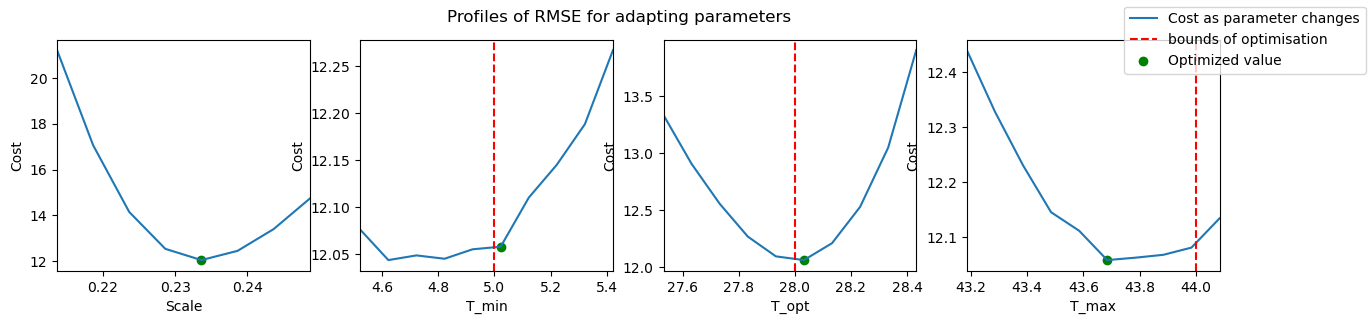

In [19]:
train, test = train_test_split(ds2_warm, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fm2s[0], train, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 5, 28, 38], ub = [5, 7.5, 33, 44], 
                         response_type = 'Wang', phase_list = ['yellow ripeness'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])


In [120]:
#x1s = [np.array([2.22415, 10, 27, 39.5])]#,
x1s = [np.array([0.8, 8, 28, 39])]
fm3s, res = local_opt(x1s, ds_warm, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='trust-constr',
                     thresholds = [20], growing_period_length=200)
train_a, test_a = train_test_split(ds, test_size=0.5, random_state = 1)


| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   1   |   0   | +2.0043e+01 | 1.00e+00 | 2.91e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   2   |   1   | +2.0972e+01 | 7.00e+00 | 4.15e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   3   |   5   | +1.5255e+01 | 7.00e+00 | 1.88e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   4   |   4   |   8   | +1.1401e+01 | 7.00e+00 | 1.56e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   5   |   6   |  12   | +1.1401e+01 | 7.00e-01 | 1.56e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   1   |
|   6   |   7   |  15   | +1.1347e+01 | 7.00e-01 | 1.54e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   7   |   8   |  18   | +1.1286e+01 | 7.00e-01 | 1.54e+01 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   8   |   9   |  21   | +9.5472e+00 | 1.40e+

c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  41   |  61   |  72   | +9.5413e+00 | 1.76e-02 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  42   |  63   |  74   | +9.5413e+00 | 8.82e-03 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  43   |  64   |  75   | +9.5413e+00 | 4.41e-03 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  44   |  65   |  76   | +9.5413e+00 | 2.20e-03 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  45   |  67   |  77   | +9.5413e+00 | 9.35e-04 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  46   |  68   |  78   | +9.5413e+00 | 4.67e-04 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  47   |  70   |  79   | +9.5413e+00 | 1.99e-04 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  48   |  72   |  80   | +9.5413e+00 | 4.29e-05 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  49   |  74   |  81   | +9.5413e+00 | 7.43e-06 | 2.43e+00 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  50   |  76   |  82   | +9.5413e+00 | 3.72e-

In [ ]:
plot_profiles_at_minimum(fm3s[0], train_a, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [39]:
x1s = [np.array([0.8, 8, 28, 39])]
fm_flowering_all = local_opt(x1s, ds, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='Nelder-Mead',
                     thresholds = [20], growing_period_length=200)

Optimization terminated successfully.
         Current function value: 8.354270
         Iterations: 166
         Function evaluations: 332
[ 0.8  8.  28.  39. ] [ 0.36830704  7.27172141 25.00229316 40.        ] [ 0.43169296  0.72827859  2.99770684 -1.        ]
RMSE at opt on test set:  8.519729409481807
R^2: 0.32706268344831224


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


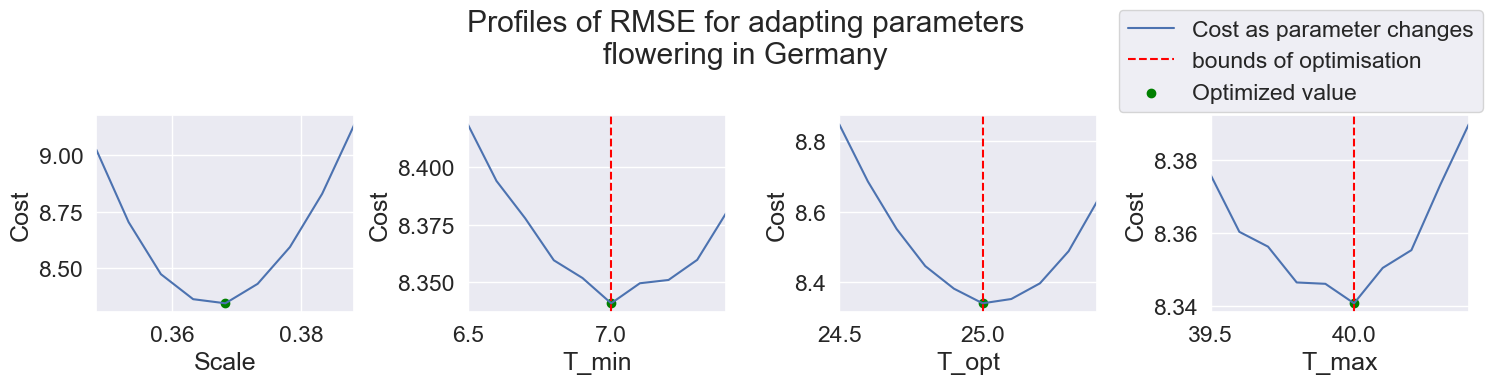

In [53]:
train_a, test_a = train_test_split(ds, test_size=0.5, random_state = 1)
sns.set(font_scale=1.5)
plot_profiles_at_minimum([fm_flowering_all[0][0][0], 7, 25, 40], train_a, #fm2s[0], ds2, #fm2s[0] #fm_flowering_all[0][0]
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20], title = '\nflowering in Germany')

In [25]:
#x1s = [np.array([2.22415, 10, 27, 39.5])]#,
x1s = [np.array([0.8, 8, 28, 39])]
fm5s, res = local_opt(x1s, ds_warm, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='Nelder-Mead',
                     thresholds = [20], growing_period_length=200)

Optimization terminated successfully.
         Current function value: 8.309354
         Iterations: 110
         Function evaluations: 237
[ 0.8  8.  28.  39. ] [ 0.38455098  7.85891439 25.01171837 38.67322138] [0.41544902 0.14108561 2.98828163 0.32677862]
RMSE at opt on test set:  8.268961093512054
R^2: 0.3372506254579203


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


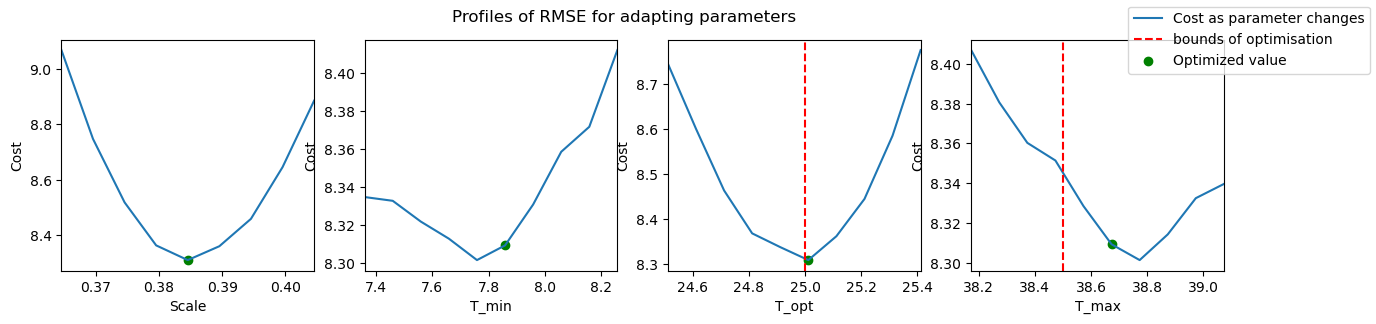

In [26]:
train_a, test_a = train_test_split(ds_warm, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fm5s[0], train_a, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [29]:
#x1s = [np.array([2.22415, 10, 27, 39.5])]#,
x1s = [np.array([0.8, 8, 28, 39])]
fm6s, res = local_opt(x1s, ds_cold, 
                     lower_bounds = [0.01, 7, 25, 38.5], upper_bounds = [5, 11, 31, 40],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['beginning of flowering'],
                     method='Nelder-Mead',
                     thresholds = [20], growing_period_length=200)

Optimization terminated successfully.
         Current function value: 8.683780
         Iterations: 196
         Function evaluations: 353
[ 0.8  8.  28.  39. ] [ 0.37629408  7.08260145 25.02142537 39.63852827] [ 0.42370592  0.91739855  2.97857463 -0.63852827]
RMSE at opt on test set:  8.666066536777695
R^2: 0.35085707964200563


Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


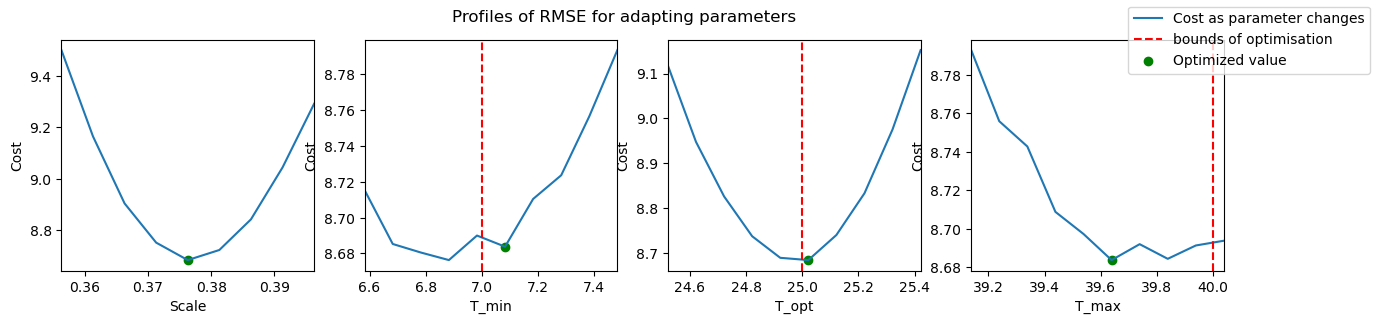

In [30]:
train_a, test_a = train_test_split(ds_cold, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fm6s[0], train_a, #fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [36]:
parameter_data = np.concatenate([np.array([fm_all_ripeness[0]]), 
                                 np.array([fm2s[0]]), np.array([fms[0]]), 
                                 np.array([fm_flowering_all[0][0]]), 
                                 np.array([fm5s[0]]), 
                                 np.array([fm6s[0]])], axis=0)

In [47]:
column_names = ['Scale (thermal time requirement)', 'T_min', 'T_opt',  'T_max']
row_names = np.array(['Full set, ripeness', 'Warm set, ripeness', 'Cold set, ripeness',
                      'Full set, flowering', 'Warm set, flowering', 'Cold set, flowering'])
R2s = np.array([-0.029379434800168136, 0.33311833790242984, 0.12521048556632275,
                0.3281956184199428, 0.3372506254579203, 0.35085707964200563])
parameters_frame = pd.DataFrame(parameter_data, columns = column_names, index = row_names)
parameters_frame['R2'] = R2s

In [62]:
np.round(parameters_frame, decimals = 2)

,Scale,T_min,T_opt,T_max,R2
"Full set, ripeness",0.24,5.00,28.16,43.96,-0.03
"Warm set, ripeness",0.23,5.02,28.03,43.68,0.33
"Cold set, ripeness",0.25,5.01,28.02,43.70,0.13
"Full set, flowering",0.38,7.01,25.07,38.89,0.33
"Warm set, flowering",0.38,7.86,25.01,38.67,0.34
"Cold set, flowering",0.38,7.08,25.02,39.64,0.35


In [26]:
def one_by_one_optimisation(x0, ds, lb, ub, phase_list = ['yellow ripeness'], thresholds = [10], growing_period_length = 200, response_type = 'Wang', ):
    fixed_params = x0.copy()[1:].tolist()
    x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds, 't2m', response_type='Wang', phase_list = phase_list, thresholds = thresholds, growing_period_length = growing_period_length),
                                                bounds = (lb[0], ub[0]),
                                                method='bounded',
                                                options = {'disp': 3})

    T_min = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, x] + fixed_params[1:], ds, 't2m', response_type='Wang', phase_list = phase_list, thresholds = thresholds, growing_period_length = growing_period_length),
                                                bounds = (lb[1], ub[1]),
                                                method='bounded',
                                                options = {'disp': 3})
                            
    T_opt = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, T_min.x, x] + fixed_params[2:], ds, 't2m', response_type='Wang', phase_list = phase_list, thresholds = thresholds, growing_period_length = growing_period_length),
                                                bounds = (lb[2], ub[2]),
                                                method='bounded',
                                                options = {'disp': 3})
    T_max = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, T_min.x, T_opt.x, x], ds, 't2m', response_type='Wang', phase_list = phase_list, thresholds = thresholds, growing_period_length = growing_period_length),
                                                bounds = (lb[3], ub[3]),
                                                method='bounded',
                                                options = {'disp': 3})

    x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x, T_min.x, T_opt.x, T_max.x], ds, 't2m', response_type='Wang', phase_list = phase_list, thresholds = thresholds, growing_period_length = growing_period_length),
                                                bounds = (lb[0], ub[0]),
                                                method='bounded',
                                                options = {'disp': 3})


    x_opt = [x_0.x, T_min.x, T_opt.x, T_max.x]
    return x_opt

In [20]:
x_opt = one_by_one_optimisation(fm3s[0], train_a,
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200,
                         thresholds = [20])

 
 Func-count     x          f(x)          Procedure
    1        1.91601      46.0385        initial
    2        3.09399      55.7688        golden
    3        1.18798       33.381        golden
    4       0.738031      16.4724        golden
    5       0.459948      17.5153        golden
    6       0.632022      10.8563        parabolic
    7       0.604678      9.86623        parabolic
    8       0.549396      9.82621        golden
    9       0.576194      9.44314        parabolic
   10        0.57635      9.44053        parabolic
   11        0.58717      9.52115        golden
   12       0.580067      9.44998        parabolic
   13       0.577953      9.45067        parabolic
   14       0.576354      9.44093        parabolic
   15       0.576282      9.44159        parabolic
   16       0.576324      9.44061        golden
   17       0.576338      9.44071        parabolic
   18       0.576345       9.4405        golden
   19       0.576342      9.44068        parabolic

Opt

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


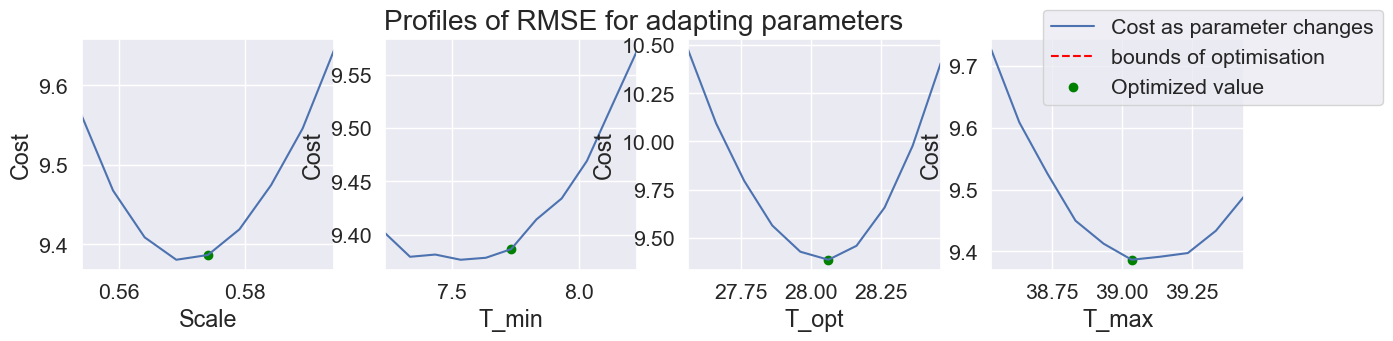

In [23]:
plot_profiles_at_minimum(x_opt, train_a,
                         lb=[0.01, 7, 25, 38.5], ub = [5, 11, 31, 40], 
                         response_type = 'Wang', phase_list = ['beginning of flowering'],
                         growing_period_length=200, new_unfinished_penalisation=False,
                         thresholds = [20])

In [35]:
def global_search(ds, param_values,
                     N = 200, 
                     interesting_threshold = 16, great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness']):
    np.random.seed(10)
    count_tested = 0
    results_array = pd.DataFrame(columns = ['Tmin', 'Topt', 'Tmax', 'optimised scale', 'RMSE'])
    for Tmin_index, Tmin in enumerate(param_values[0]):
        for Topt_index, Topt in enumerate(param_values[1]):
            for Tmax_index, Tmax in enumerate(param_values[2]):
                x0 = [0.12, Tmin, Topt, Tmax]
                constraint_violation = x0[1] < x0[0] or x0[2] < x0[1]
                if constraint_violation:
                    print(x0, 'goes against constraints')
                    continue
                fixed_params = [Tmin, Topt, Tmax]
                x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds, 't2m', response_type=response_type, phase_list = phase_list),
                                                    bounds = (0.05, 1.5),
                                                    method='bounded',
                                                    options = {'disp': 2})
                x1 = np.array([x_0.x] + fixed_params)
                opt_value = run_GDD_and_get_RMSE(x1, ds, 't2m', response_type=response_type,  phase_list = phase_list)
                new_row = pd.DataFrame({'Tmin':[Tmin], 'Topt':[Topt], 'Tmax':[Tmax], 'optimised scale':[x1[0]], 'RMSE':[opt_value]})
                count_tested += 1
                print(f'{count_tested} samples considered')
                results_array = pd.concat([results_array, new_row])
                print(results_array)
    return results_array

In [44]:
def run_GDD_and_plot(x, ds, driver_variable, latlon_proj = True, response_type = 'Trapezoid', 
                             phase_list = ['beginning of flowering'], exclude_unfinished = False,
                             growing_period_length = 300, thresholds = [100], 
                             title_extra='', method='scatter'):
    if response_type == 'Trapezoid':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Trapezoid_Temp_response(meantemp, x[1], x[2], x[3], x[4])
    elif response_type == 'Wang':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(len(ds)) #Continuous development time. When this passes through some thresholds then have change in phase.
    dev_time_series = [t_dev.copy()]
    ## Make sure driver dataset uses station id to index this dimension
    
    #Run model
    for day in range(growing_period_length):
        # Pull values for temperature out of data frame
        driver_values = ds[f'temperature at day {day}']
        # Calculate the response for each of these temperatures and add it to the total accumulated temperature
        t_dev += response(driver_values)#, t_dev)
        #Store the accumulated temperature in an array
        dev_time_series.append(t_dev.copy())

    # Add the year and station codes for indexing later and to check that extracting values didn't mix up indexes
    dev_time_series.append(ds['Referenzjahr'].values)
    dev_time_series.append(ds['Stations_id'].values)
    #print([p.shape for p in dev_time_series])
    model_dev_time_series = np.array(dev_time_series)
    #driver_array['Development Time'] = (('days from emergence', 'Emergence observation'), model_dev_time_series)
    column_names = np.concatenate([np.array([f'modelled time to {phase}' for phase in phase_list]), ['Referenzjahr'], ['Stations_id']])
    phase_dates_array = np.zeros((len(thresholds), model_dev_time_series.shape[1]))
    for obs_index in range(model_dev_time_series.shape[1]):
        phase_dates_array[:, obs_index] = np.digitize(thresholds, model_dev_time_series[:-2, obs_index].astype(np.float64))    
    #print(phase_dates_array)
    phase_dates_array = np.concatenate([phase_dates_array, [model_dev_time_series[-2]], [model_dev_time_series[-1]]], axis=0)
    phase_dates_array = pd.DataFrame(phase_dates_array.T, columns = column_names)
    comparison_array = ds.merge(phase_dates_array, how='left', on=['Referenzjahr', 'Stations_id']).dropna()
    fig, axs = plt.subplots(1, len(phase_list), figsize = (len(phase_list)*5, 5))
    for phase_index, phase in enumerate(phase_list):
        number_unfinished = (comparison_array[f'modelled time to {phase}'] >= growing_period_length).sum()
        number_total = len(comparison_array)
        print(f'{number_unfinished} stations out of {number_total} did not reach the end of phase \'{phase}\'')
        if exclude_unfinished:
            comparison_array = comparison_array[comparison_array[f'modelled time to {phase}'] < growing_period_length].dropna()
        comparison_array[f'observed time to {phase}'] = comparison_array[f'observed time to {phase}'].dt.days
        if len(phase_list) == 1:
            ax = axs
        else:
            ax = axs[phase_index]
        if method == 'scatter':
            #x_estimator=np.mean,
            #minval = min(comparison_array[f'observed time to {phase}'].min(), comparison_array[f'modelled time to {phase}'].min()) - 1
            #maxval = max(comparison_array[f'observed time to {phase}'].max(), comparison_array[f'modelled time to {phase}'].max()) + 1
            minval = min(comparison_array[f'observed time to {phase}'].quantile(0.05), comparison_array[f'modelled time to {phase}'].quantile(0.05)) - 1
            maxval = max(comparison_array[f'observed time to {phase}'].quantile(0.95), comparison_array[f'modelled time to {phase}'].quantile(0.95)) + 1
            sns.regplot(x=f'modelled time to {phase}', y=f'observed time to {phase}', data=comparison_array, ax=axs,
                        scatter_kws={'alpha':0.5, 's':4},  x_bins=np.arange(minval - 5, maxval + 5, 10))
            axs.plot([minval, maxval], [minval, maxval], linestyle='--', color='k', lw=1, scalex=False, scaley=False)
            axs.set_xlim(minval, maxval)
            axs.set_ylim(minval, maxval)
            axs.set_title(f'Comparison of modelled and observed time to {phase}\n{title_extra}')
        elif method == 'histogram':
            sns.histplot(x=f'modelled time to {phase}', data = comparison_array, ax=ax, label = 'fitted',
                        stat = 'density')
            sns.histplot(x=f'observed time to {phase}', data = comparison_array, ax=ax, label= 'observed',
                        stat = 'density')
            ax.set_xlabel('Days to anthesis')
            #ax.plot([minval, maxval], [minval, maxval], linestyle = '--', color='k')
            fig.legend(bbox_to_anchor = (1.2, 0.9))
            rsquared = r2_score(comparison_array[f'observed time to {phase}'], comparison_array[f'modelled time to {phase}'])
            print(f'R^2 value for model: {rsquared}')
            bias = comparison_array[f'observed time to {phase}'].mean() - comparison_array[f'modelled time to {phase}'].mean()
            variance_modelled = comparison_array[f'modelled time to {phase}'].var()
            print(f'Bias: {bias**2}\nVariance of modelled values: {variance_modelled}')

    rsquared = r2_score(comparison_array[f'observed time to {phase}'], comparison_array[f'modelled time to {phase}'])
    print(f'R^2 value for model: {rsquared}')
    bias = comparison_array[f'observed time to {phase}'].mean() - comparison_array[f'modelled time to {phase}'].mean()
    variance_modelled = comparison_array[f'modelled time to {phase}'].var()
    print(f'Bias: {bias**2} (sign {np.sign(bias)})\nVariance of modelled values: {variance_modelled}')
    return comparison_array

8 stations out of 1404 did not reach the end of phase 'yellow ripeness'
R^2 value for model: 0.07936085266295356
Bias: 8.17780750562087 (sign 1.0)
Variance of modelled values: 200.14510369517527


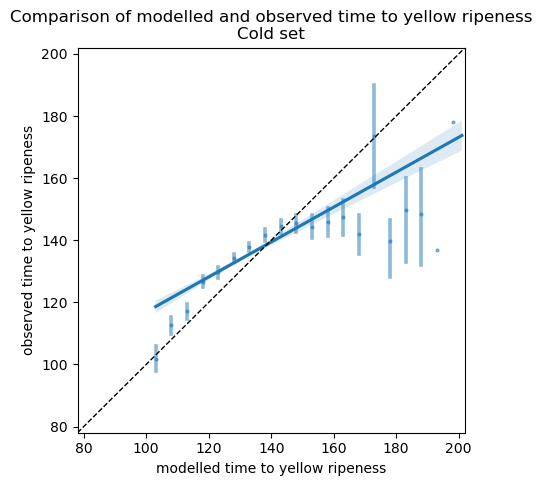

In [54]:
train, test = train_test_split(ds2_cold, test_size=0.5, random_state = 1)
ca_ripeness_cold = run_GDD_and_scatter_plot(fms[0], test, 't2m', response_type='Wang', phase_list = ['yellow ripeness'], exclude_unfinished=False, growing_period_length=200, thresholds = [20],
                                            title_extra='Cold set')

0 stations out of 2540 did not reach the end of phase 'yellow ripeness'
R^2 value for model: 0.33285568265938137
Bias: 0.4453197656395564 (sign 1.0)
Variance of modelled values: 121.66391008922236


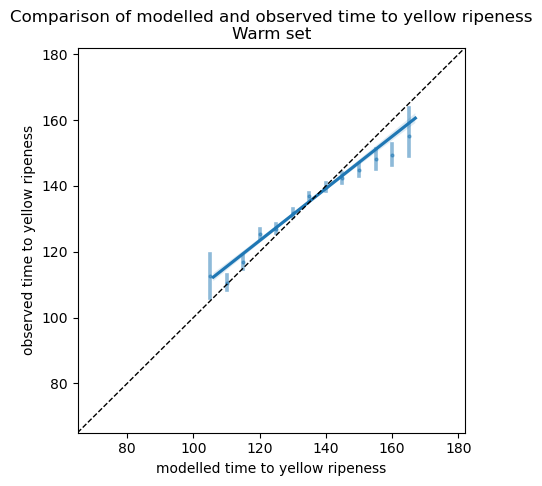

In [55]:
train, test = train_test_split(ds2_warm, test_size=0.5, random_state = 1)
ca_ripeness = run_GDD_and_scatter_plot(fm2s[0], test, 't2m', response_type='Wang', phase_list = ['yellow ripeness'], exclude_unfinished=False, growing_period_length=200, thresholds = [20],
                                            title_extra='Warm set')

39 stations out of 3944 did not reach the end of phase 'yellow ripeness'
R^2 value for model: -0.029640499835624334
Bias: 2.9421295320080136 (sign 1.0)
Variance of modelled values: 221.68053374943779


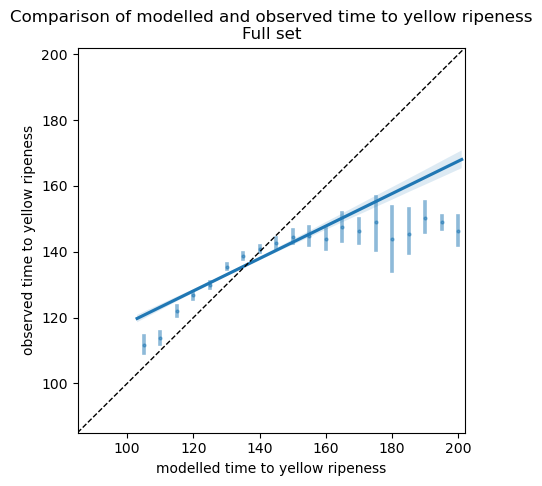

In [56]:
train, test = train_test_split(ds2, test_size=0.5, random_state = 1)
ca_ripeness = run_GDD_and_scatter_plot(fm_all_ripeness[0], test, 't2m', response_type='Wang', phase_list = ['yellow ripeness'], exclude_unfinished=False, growing_period_length=200, thresholds = [20],
                                            title_extra='Full set')

0 stations out of 52 did not reach the end of phase 'beginning of flowering'
R^2 value for model: -0.006254666652238505
Bias: 12.384985207100623
Variance of modelled values: 53.13838612368024
R^2 value for model: -0.006254666652238505
Bias: 12.384985207100623 (sign 1.0)
Variance of modelled values: 53.13838612368024


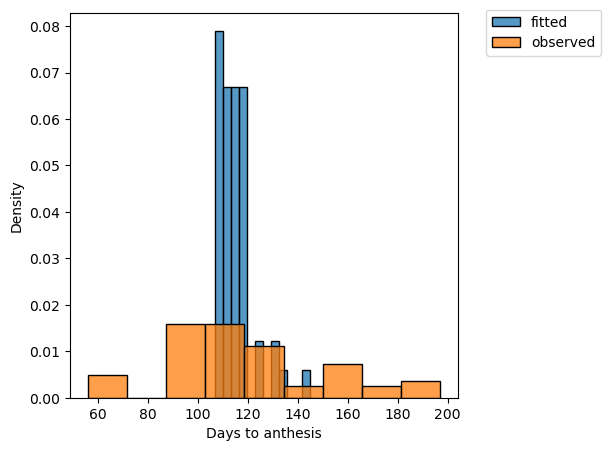

In [45]:
train_a, test_a = train_test_split(ds, test_size=0.2, random_state = 1)
ca_flowering = run_GDD_and_plot([fm_flowering_all[0][0][0], 7, 25, 40], test_a, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], exclude_unfinished=False, growing_period_length=300, 
                                        thresholds = [20], title_extra='Full set', method = 'histogram')#np.concatenate((np.array([0.5]), fm_flowering_all[0][0][1:]))

In [29]:
fm_flowering_all[0][0]

array([ 0.18833668,  7.5060529 , 25.0202482 , 39.96409198])

In [206]:
np.concatenate((np.array([0.5]), fm_flowering_all[0][0][1:]))

array([ 0.5       ,  9.69138985, 31.        , 38.9057878 ])

0 stations out of 3484 did not reach the end of phase 'beginning of flowering'
R^2 value for model: 0.3370603442708511
Bias: 0.01272415081705384 (sign 1.0)
Variance of modelled values: 52.864617728293425


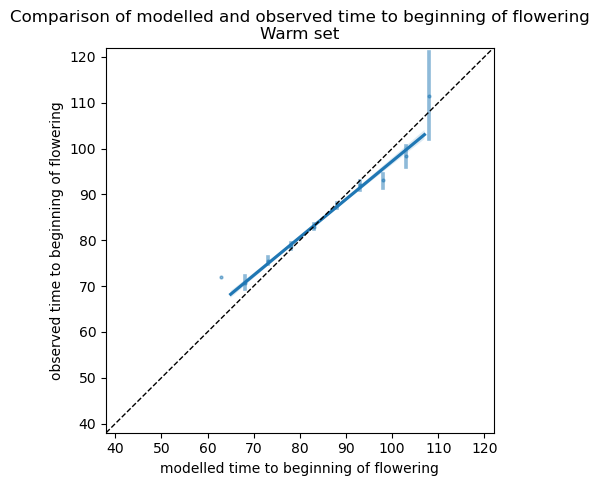

In [60]:
train_a, test_a = train_test_split(ds_warm, test_size=0.5, random_state = 1)
ca_flowering = run_GDD_and_scatter_plot(fm5s[0], test_a, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], exclude_unfinished=False, growing_period_length=200, 
                                        thresholds = [20], title_extra='Warm set')

0 stations out of 2115 did not reach the end of phase 'beginning of flowering'
R^2 value for model: 0.3505500110893277
Bias: 0.015817670696199153 (sign -1.0)
Variance of modelled values: 52.15977374745873


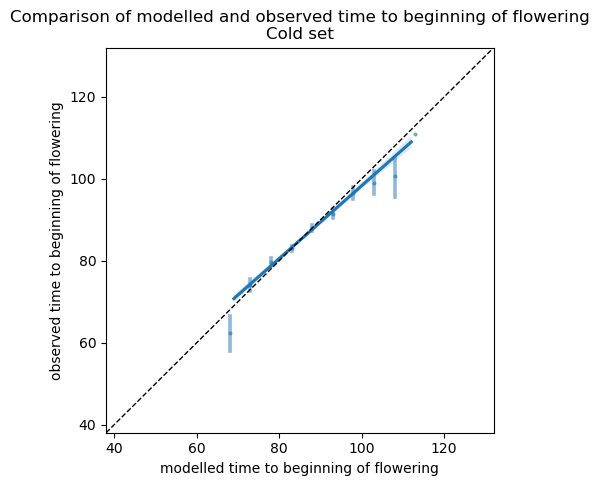

In [61]:
train_a, test_a = train_test_split(ds_cold, test_size=0.5, random_state = 1)
ca_flowering = run_GDD_and_scatter_plot(fm6s[0], test_a, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], exclude_unfinished=False, growing_period_length=200, 
                                        thresholds = [20], title_extra='Cold set')

0 stations out of 5599 did not reach the end of phase 'beginning of flowering'
R^2 value for model: 0.16468430613847995
Bias: 0.3049706430558551
Variance of modelled values: 98.71395226307803


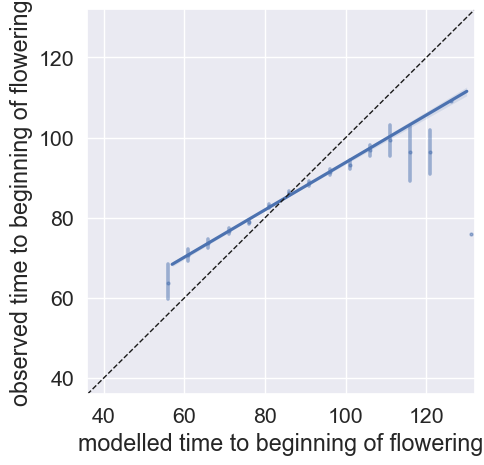

In [41]:
ca_flowering_2nd_min = run_GDD_and_scatter_plot(x_opt, test_a, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], exclude_unfinished=False, growing_period_length=200, thresholds = [20])

In [23]:
ca_not_matured = ca_ripeness.where(ca_ripeness['modelled time to yellow ripeness'] ==201).dropna()
ca_not_matured = get_station_locations(ca_not_matured, Maize_set.station_data)
ca_not_matured[['lat', 'lon', 'Referenzjahr']].to_csv('Saved_files/canm_latlon2.csv')
ca_not_matured['Referenzjahr'].unique()

array([2002., 2004., 2010., 2008., 2015., 2007., 2012.])

In [127]:
ca_late_matured = ca_ripeness.where(ca_ripeness['modelled time to yellow ripeness'] > 160).dropna()
ca_late_matured = get_station_locations(ca_late_matured, Maize_set.station_data)
ca_late_matured[['lat', 'lon', 'Referenzjahr']].to_csv('Saved_files/calm_latlon3.csv')
ca_late_matured['Referenzjahr'].unique()

array([2015., 2010., 2004., 2012.])

In [128]:
ca_bad_flowering = ca_flowering.where(ca_flowering['modelled time to beginning of flowering'] > 100).dropna()
ca_bad_flowering = get_station_locations(ca_bad_flowering, Maize_set.station_data)
ca_bad_flowering[['lat', 'lon', 'Referenzjahr']].to_csv('Saved_files/cabf_latlon3.csv')

In [65]:
print(run_GDD_and_get_RMSE(fm2s[0], ds2, 't2m', response_type = 'Wang', phase_list = ['yellow ripeness'], new_unfinished_penalisation=True),
      run_GDD_and_get_RMSE(fm2s[0], ds2, 't2m', response_type = 'Wang', phase_list = ['yellow ripeness'], new_unfinished_penalisation=False))

0 7767
21.37204687891441 28.512367772840147


In [72]:
x0 = np.array([11.36, 5.757, 22.68, 25.17, 45])
x0 = np.array([11.36, 5.757, 22.68, 35, 45])
x0 = np.array([1, 5.757, 26, 45])
x0 = fm2s[0]
thresholds = [20]
phase_list = ['yellow ripeness']
ds = train
grad_algebraic = run_GDD_and_get_RMSE_derivs(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang',
                                             thresholds = thresholds, phase_list = phase_list)
for h in [0.00005, 0.0001, 0.001]:#, 0.01, 0.1]:
    grads_numeric0 = []
    grads_numeric1 = []
    grads_numeric2 = []
    for x_index in range(len(x0)):
        x_plus_h = x0
        x_minus_h =  x0
        h_perturb = [0 for count in range(len(x0))]
        h_perturb[x_index] = h
        h_perturb = np.array(h_perturb)
        x_plus_h = x_plus_h + h_perturb
        x_minus_h = x_minus_h - h_perturb
        #print(x_minus_h, x_plus_h)
        grad_numeric = (run_GDD_and_get_RMSE(x_plus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list) - run_GDD_and_get_RMSE(x_minus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list))/(2*h)
        grads_numeric0.append(grad_numeric)
        grad_numeric = (run_GDD_and_get_RMSE(x_plus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list) - run_GDD_and_get_RMSE(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list))/h
        grads_numeric1.append(grad_numeric)
        grad_numeric = (run_GDD_and_get_RMSE(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list) - run_GDD_and_get_RMSE(x_minus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang', thresholds = thresholds, phase_list = phase_list))/h
        grads_numeric2.append(grad_numeric)
    
    print(grads_numeric0, grads_numeric1, grads_numeric2, grad_algebraic)

[-1292.5468879190305, -2.7218698514275275, -3.9083131800410342, 2.7218698514275275] [81.50798186044028, 0.0, 0.0, 5.443739702855055] [-2666.601757698501, -5.443739702855055, -7.8166263600820685, 0.0] [-202.91674872518774, 3.157642170902563, 6.9215807791176225, -2.7095578619232334]
[-1274.0800070536727, -1.9541565900205171, 4.850178188871013, 1.9541565900205171] [-1228.0235000203631, 0.0, 18.70330873369852, 3.9083131800410342] [-1320.1365140869825, -3.9083131800410342, -9.002952355956495, 0.0] [-202.91674872518774, 3.157642170902563, 6.9215807791176225, -2.7095578619232334]
[-395.86769324261263, 0.432652759204899, 1.6780339956827817, -0.3872948201770754] [-348.30672062962617, 2.868227168267623, 6.712755886493227, 2.0099000849782556] [-443.42866585559904, -2.002921649857825, -3.3566878951276635, -2.7844897253324064] [-202.91674872518774, 3.157642170902563, 6.9215807791176225, -2.7095578619232334]
